In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
dt, dr, dtheta, dphi, dphi_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi}")

In [4]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [5]:
tau, dtau = sympy.symbols("tau d\\tau")

In [6]:
a, r_tilde_plus = sympy.symbols("a \\tilde{r}_+")

### Metric

In [7]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig

#### Just Wick Rotation

In [8]:
dt_val = sympy.I * dtau

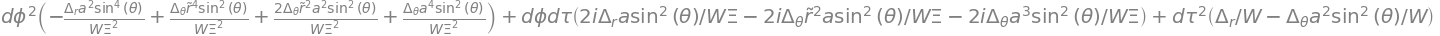

In [9]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [10]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric.coeff(dtau * dphi) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric.coeff(dphi ** 2)

In [11]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡                          2    2                                       ⎛     
⎢             Δᵣ - Δₜₕₑₜₐ⋅a ⋅sin (θ)                                ⅈ⋅a⋅⎝Δᵣ - 
⎢             ──────────────────────                                ──────────
⎢                       W                                                     
⎢                                                                             
⎢    ⎛                     2           2⎞    2     ⎛      2    2              
⎢ⅈ⋅a⋅⎝Δᵣ - Δₜₕₑₜₐ⋅\tilde{r}  - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)  ⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\
⎢────────────────────────────────────────────────  ───────────────────────────
⎢                      W⋅Ξ                                                    
⎣                                                                             

                2           2⎞    2                    ⎤
Δₜₕₑₜₐ⋅\tilde{r}  - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)                 ⎥
──────────────────────────────────────                 ⎥
            W⋅Ξ                       

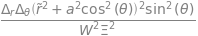

In [12]:
g_mat.det().simplify()

In [13]:
g_00 = delta_r - delta_theta * a ** 2 * sympy.sin(theta) ** 2
g_00

In [14]:
g_11 = (r_tilde ** 2 + a ** 2) ** 2 * delta_theta - delta_r * a ** 2 * sympy.sin(theta) ** 2
g_11

In [15]:
(g_11 * sympy.sin(theta) ** 2 / (W * xi ** 2) - g_mat[1, 1]).simplify()

In [16]:
delta_r_val = (r_tilde ** 2 - r_tilde_plus ** 2) ** 2 + (r_tilde_plus ** 2 + 1) ** 2 * ((r_tilde_plus - r_tilde) ** 2)
delta_r_val

In [17]:
xi_val = 1 - a ** 2
a_val = r_tilde_plus ** 2
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2

##### $g_{00}$

In [18]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [19]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00.factor()

In [20]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

In [21]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [22]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.factor()

##### $g_{11}$

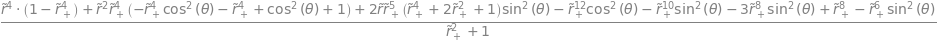

In [23]:
g_11_simp = g_11.subs({delta_r: delta_r_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_11_simp /= (r_tilde_plus ** 2 + 1)
g_11_simp = g_11_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_11_simp.simplify()

In [24]:
A_coeff_11 = g_11_simp.coeff(r_tilde).simplify()
A_coeff_11.factor()

In [25]:
B_coeff_11 = g_11_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_11

In [26]:
C_coeff_11 = g_11_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_11

In [27]:
D_coeff_11 = g_11_simp - A_coeff_11 * r_tilde - B_coeff_11 * r_tilde ** 2 - C_coeff_11 * r_tilde ** 4
D_coeff_11 = D_coeff_11.simplify().factor()
D_coeff_11

This is the same as:

In [28]:
D_coeff_11_new = -r_tilde_plus ** 6 * (r_tilde_plus ** 4 * sympy.cos(theta) ** 2 - r_tilde_plus ** 2 * sympy.cos(2 * theta) + sympy.sin(theta) ** 2)
D_coeff_11_new

In [29]:
D_coeff_11_new = r_tilde_plus ** 6 * (r_tilde_plus ** 4 * sympy.sin(theta) ** 2 + r_tilde_plus ** 2 + 2 * r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + sympy.cos(theta) ** 2)
D_coeff_11_new -= r_tilde_plus ** 6 * (r_tilde_plus ** 2 + 1) ** 2
D_coeff_11_new

In [39]:
D_coeff_11_new = r_tilde_plus ** 6 * (sympy.sin(theta) ** 2 * (r_tilde_plus ** 2 - 1) ** 2 + r_tilde_plus ** 2 * (1 - r_tilde_plus ** 2) - 2 * sympy.sin(theta) ** 2)
D_coeff_11_new

In [40]:
(D_coeff_11 - D_coeff_11_new).simplify()

In [41]:
sigma_quartic = C_coeff_11 * r_tilde ** 4 + B_coeff_11 * r_tilde ** 2 + A_coeff_11 * r_tilde + D_coeff_11
sigma_quartic

In [42]:
(sigma_quartic - g_11_simp).simplify()

In [166]:
D_coeff_11.factor()

Get the roots.

In [78]:
sol = sympy.solve(sigma_quartic, r_tilde)

In [79]:
roots = {}

r_tilde_plus_vals = range(1, 21)
theta_val = np.pi / 2

for r_tilde_plus_val in r_tilde_plus_vals:
    root_vals = []
    for i in range(4):
        root = sol[i].subs({r_tilde_plus: r_tilde_plus_val, theta: theta_val}).evalf()
        root_vals.append(root)
    roots[r_tilde_plus_val] = root_vals

In [80]:
roots

{1: [nan, nan, nan, nan], 2: [-2.0655502102563 - 5.01763867140387⋅ⅈ, -2.065550
2102563 + 5.01763867140387⋅ⅈ, 1.26323948828632, 2.86786093222627], 3: [-3.0167
1329135522 - 9.99725386493028⋅ⅈ, -3.01671329135522 + 9.99725386493028⋅ⅈ, 2.154
17826285794, 3.87924831985251], 4: [-4.00553403306599 - 16.9973687937857⋅ⅈ, -4
.00553403306599 + 16.9973687937857⋅ⅈ, 3.09892489354701, 4.91214317258498], 5: 
[-5.00217667639291 - 25.9983869339842⋅ⅈ, -5.00217667639291 + 25.9983869339842⋅
ⅈ, 4.06805668117599, 5.93629667160983], 6: [-6.00097514588222 - 36.99903996623
61⋅ⅈ, -6.00097514588222 + 36.9990399662361⋅ⅈ, 5.04936964981499, 6.952580641949
45], 7: [-7.00048346330319 - 49.9994123896809⋅ⅈ, -7.00048346330319 + 49.999412
3896809⋅ⅈ, 6.03731064733924, 7.96365627926715], 8: [-8.0002597625142 - 64.9996
263160169⋅ⅈ, -8.0002597625142 + 64.9996263160169⋅ⅈ, 7.02912193170383, 8.971397
59332456], 9: [-9.00014892574028 - 81.9997532989463⋅ⅈ, -9.00014892574028 + 81.
9997532989463⋅ⅈ, 8.02332769488969, 9.97697015659087]

In [81]:
root_imag_part = [r[1].coeff(sympy.I) for r in roots.values()]
root_imag_part

In [82]:
[r ** 2 for r in r_tilde_plus_vals]

In [83]:
root_real_part = [r[1] - sympy.I * r[1].coeff(sympy.I) for r in roots.values()]
root_real_part

[nan, -2.0655502102563, -3.01671329135522, -4.00553403306599, -5.0021766763929
1, -6.00097514588222, -7.00048346330319, -8.0002597625142, -9.00014892574028, 
-10.0000900483063, -11.0000569141056, -12.0000373415834, -13.0000252940363, -1
4.0000176113819, -15.0000125595593, -16.0000091472903, -17.000006787252, -18.0
000051202953, -19.0000039205527, -20.0000030423708]

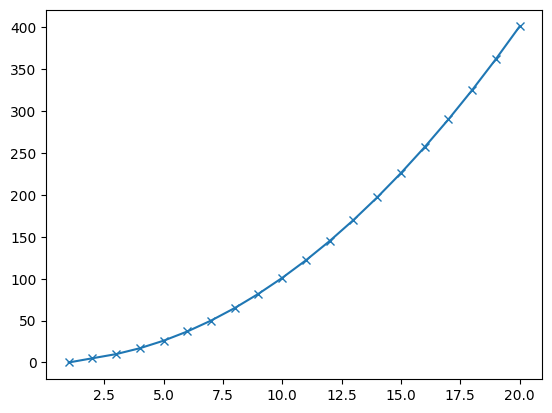

In [84]:
plt.plot(r_tilde_plus_vals, root_imag_part, 'x-');

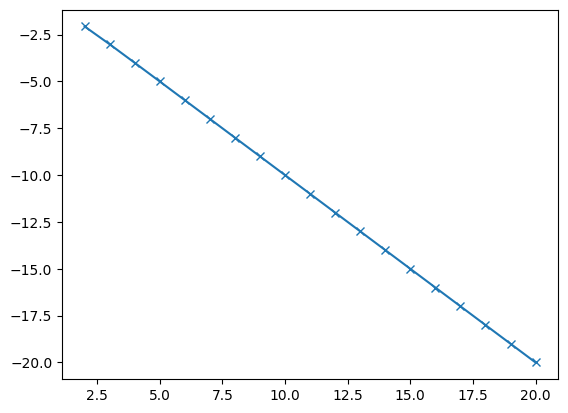

In [85]:
plt.plot(r_tilde_plus_vals, root_real_part, 'x-');

Plot the function.

In [129]:
# this constraint has to be satisfied: r_tilde_plus ** 2 < 1
r_tilde_plus_val = 0.1

r_tilde_vals = np.linspace(0.1, 10, 50)
theta_val = 2 * np.pi / 3

sigma_quartic_vals = []

for r_tilde_val in r_tilde_vals:
    sigma_quartic_vals.append(sigma_quartic.subs({r_tilde_plus: r_tilde_plus_val, r_tilde: r_tilde_val, theta: theta_val}))

In [130]:
sigma_quartic_vals

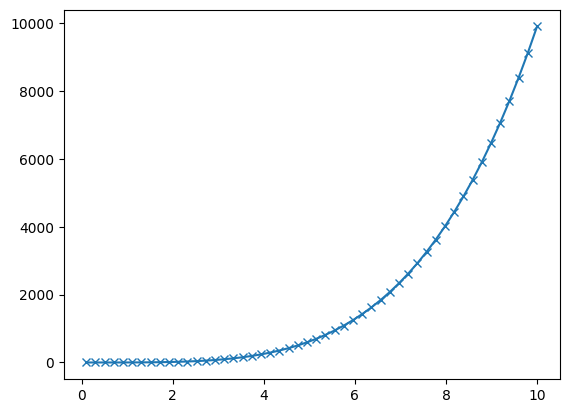

In [131]:
plt.plot(r_tilde_vals, sigma_quartic_vals, 'x-');

#### Wick Rotation + Omega Shift

In [38]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

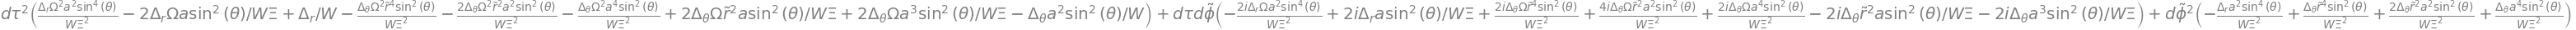

In [39]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [40]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [41]:
g_mat_2 = sympy.Matrix(metric_list_matrix)
g_mat_2.simplify()
g_mat_2

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ──────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

  2              ⎛                      2           2⎞    2       2 ⎛         
in (θ) + 2⋅Ω⋅Ξ⋅a⋅⎝-Δᵣ + Δₜₕₑₜₐ⋅\tilde{r}  + Δₜₕₑₜₐ⋅

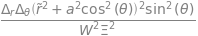

In [42]:
g_mat_2.det().simplify()

##### $g_{00}$

In [43]:
g_00 = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2 * sympy.sin(theta) ** 2
g_00

In [44]:
(g_00 / (W * xi ** 2) - g_mat_2[0, 0]).expand().simplify()

In [45]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [46]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00.factor()

In [47]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

In [48]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [49]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.simplify().factor()

##### $g_{11}$

This component remains unchanged.

#### Wick Rotation + Omega Shift + Non-rotating Frame

In [50]:
dphi_prime = sympy.symbols("d\phi'")
dphi_tilde_val = dphi_prime - a * dt_val
dphi_tilde_val

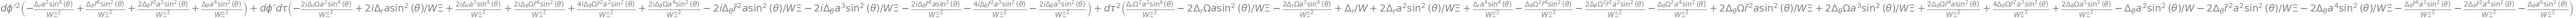

In [51]:
euclidean_metric_3 = euclidean_metric_2.subs({dphi_tilde: dphi_tilde_val}).expand().collect([dtau ** 2, dtau * dphi_prime, dphi_prime ** 2])
euclidean_metric_3

In [52]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric_3.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_3.coeff(dtau * dphi_prime) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric_3.coeff(dphi_prime ** 2)

In [53]:
g_mat_3 = sympy.Matrix(metric_list_matrix)
g_mat_3.simplify()
g_mat_3

⎡ 2 ⎛             2    2   ⎞         ⎛                                 2      
⎢Ξ ⋅⎝Δᵣ - Δₜₕₑₜₐ⋅a ⋅sin (θ)⎠ + 2⋅Ξ⋅a⋅⎝-Δᵣ⋅Ω + Δᵣ⋅a + Δₜₕₑₜₐ⋅Ω⋅\tilde{r}  + Δₜₕ
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢       ⎛        2    2          3    2                        4              
⎢     ⅈ⋅⎝- Δᵣ⋅Ω⋅a ⋅sin (θ) + Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅Ω⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅Ω⋅
⎢     ────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

       2                   2             3⎞    2              2 ⎛    2    2   
ₑₜₐ⋅Ω⋅a  - Δₜₕₑₜₐ⋅\tilde{r} ⋅a - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)

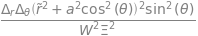

In [54]:
g_mat_3.det().simplify()

##### $g_{00}$

In [55]:
g_00 = delta_r * (xi + a * (a - omega) * sympy.sin(theta) ** 2) ** 2 - delta_theta * sympy.sin(theta) ** 2 * (a * xi + (a - omega) * (r_tilde ** 2 + a ** 2)) ** 2
g_00

In [56]:
(g_00 / (W * xi ** 2) - g_mat_3[0, 0]).expand().simplify()

In [57]:
g_00 = g_00.subs({omega: 1})
g_00

In [58]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [59]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00

In [60]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

This is the same as:

In [61]:
B_coeff_00_2 = (r_tilde_plus - 1) ** 2 * (r_tilde_plus + 1) ** 2 * (r_tilde_plus ** 2 + 1) ** 2 * (r_tilde_plus ** 4 * sympy.cos(theta) ** 4 + 1)
B_coeff_00_2

In [62]:
(B_coeff_00 - B_coeff_00_2).simplify()

In [64]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [65]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.simplify()

This is the same as:

In [66]:
D_coeff_00_new = (r_tilde_plus - 1) ** 2 * (r_tilde_plus + 1) ** 2 * (r_tilde_plus ** 2 + 1) ** 2 * r_tilde_plus ** 2 * (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) ** 2)
D_coeff_00_new

In [67]:
(D_coeff_00 - D_coeff_00_new).simplify()

##### $g_{11}$

This component remains unchanged.